https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [37]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [38]:
# unicos
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [39]:
# valores
df['week'].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

In [40]:
# clases
df['week']

0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
       ...  
343     Tues
344      Wed
345    Thurs
346      Fri
347      Sat
Name: week, Length: 348, dtype: object

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_tr = le.fit_transform(df['week'])
df_tr

array([5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [87]:
# dummies
df_dummies = pd.get_dummies(df['week'], dtype=int)
df_d = pd.concat([df, df_dummies], axis=1)
df_d

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y,0,1,2,3,4,5,6
1,2016,1,2,5,44,45,45.7,44,41,50,44,61,49.677419,0,0,0,0,0,1,0
2,2016,1,3,6,45,44,45.8,41,43,46,47,56,54.115385,0,0,0,0,0,0,1
3,2016,1,4,0,44,41,45.9,40,44,48,46,53,56.483871,1,0,0,0,0,0,0
4,2016,1,5,1,41,40,46.0,44,46,46,46,41,66.433333,0,1,0,0,0,0,0
5,2016,1,6,2,40,44,46.1,51,43,49,48,40,68.838710,0,0,1,0,0,0,0
6,2016,1,7,3,44,51,46.2,45,45,49,46,38,73.233333,0,0,0,1,0,0,0
7,2016,1,8,4,51,45,46.3,48,43,47,46,34,76.225806,0,0,0,0,1,0,0
8,2016,1,9,5,45,48,46.4,50,46,50,45,47,77.947368,0,0,0,0,0,1,0
9,2016,1,10,6,48,50,46.5,52,45,48,48,49,70.428571,0,0,0,0,0,0,1
10,2016,1,11,0,50,52,46.7,45,42,48,48,39,63.900000,1,0,0,0,0,0,0


In [43]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6
week_dict = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}
df['week'] = df['week'].map(week_dict)

In [92]:
df = df_d.drop(columns='week')
df

,year,month,day,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y,0,1,2,3,4,5,6
1,2016,1,2,44,45,45.7,44,41,50,44,61,49.677419,0,0,0,0,0,1,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,54.115385,0,0,0,0,0,0,1
3,2016,1,4,44,41,45.9,40,44,48,46,53,56.483871,1,0,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,66.433333,0,1,0,0,0,0,0
5,2016,1,6,40,44,46.1,51,43,49,48,40,68.838710,0,0,1,0,0,0,0
6,2016,1,7,44,51,46.2,45,45,49,46,38,73.233333,0,0,0,1,0,0,0
7,2016,1,8,51,45,46.3,48,43,47,46,34,76.225806,0,0,0,0,1,0,0
8,2016,1,9,45,48,46.4,50,46,50,45,47,77.947368,0,0,0,0,0,1,0
9,2016,1,10,48,50,46.5,52,45,48,48,49,70.428571,0,0,0,0,0,0,1
10,2016,1,11,50,52,46.7,45,42,48,48,39,63.900000,1,0,0,0,0,0,0


In [95]:
# agrupar por mes y quedarse con la media de la columna temp_1
monthly_mean = pd.DataFrame(df.groupby(['month'])['temp_1'].mean())
monthly_mean

,temp_1_y
month,
1,63.166033


In [46]:
# merge del dataframe anterior con el original
df = df.merge(monthly_mean, left_index=True, right_index=True)
df

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
1,2016,1,2,5,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,6,45,44,45.8,41,43,46,47,56,54.115385
3,2016,1,4,0,44,41,45.9,40,44,48,46,53,56.483871
4,2016,1,5,1,41,40,46.0,44,46,46,46,41,66.433333
5,2016,1,6,2,40,44,46.1,51,43,49,48,40,68.838710
6,2016,1,7,3,44,51,46.2,45,45,49,46,38,73.233333
7,2016,1,8,4,51,45,46.3,48,43,47,46,34,76.225806
8,2016,1,9,5,45,48,46.4,50,46,50,45,47,77.947368
9,2016,1,10,6,48,50,46.5,52,45,48,48,49,70.428571
10,2016,1,11,0,50,52,46.7,45,42,48,48,39,63.900000


In [28]:
import seaborn as sns

<Axes: >

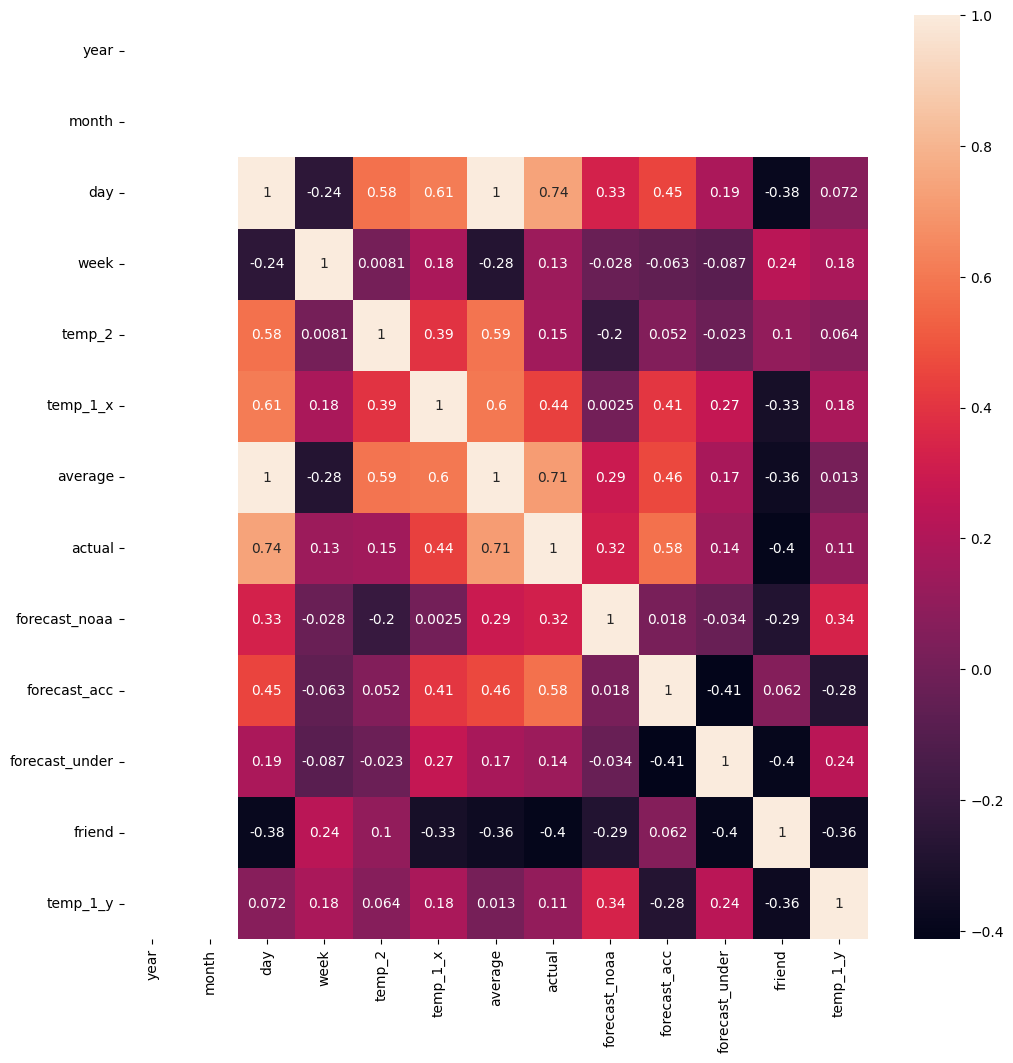

In [52]:
import matplotlib.pyplot as plt
corrmat = df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, annot = True)

### 3. Divide en train y test

In [57]:
from sklearn.model_selection import train_test_split


In [97]:
X = df.drop(columns=['actual'])
y = df['actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### 4. Entrena el modelo


In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [59]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [96]:
pd.DataFrame(dtr.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

ValueError: Shape of passed values is (12, 1), indices imply (3, 1)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [66]:
y_pred = dtr.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación -4.0
MAE 4.0
MAPE 0.08707482993197278
MSE 20.0
RMSE 4.47213595499958


### 6. Representa el árbol de decision

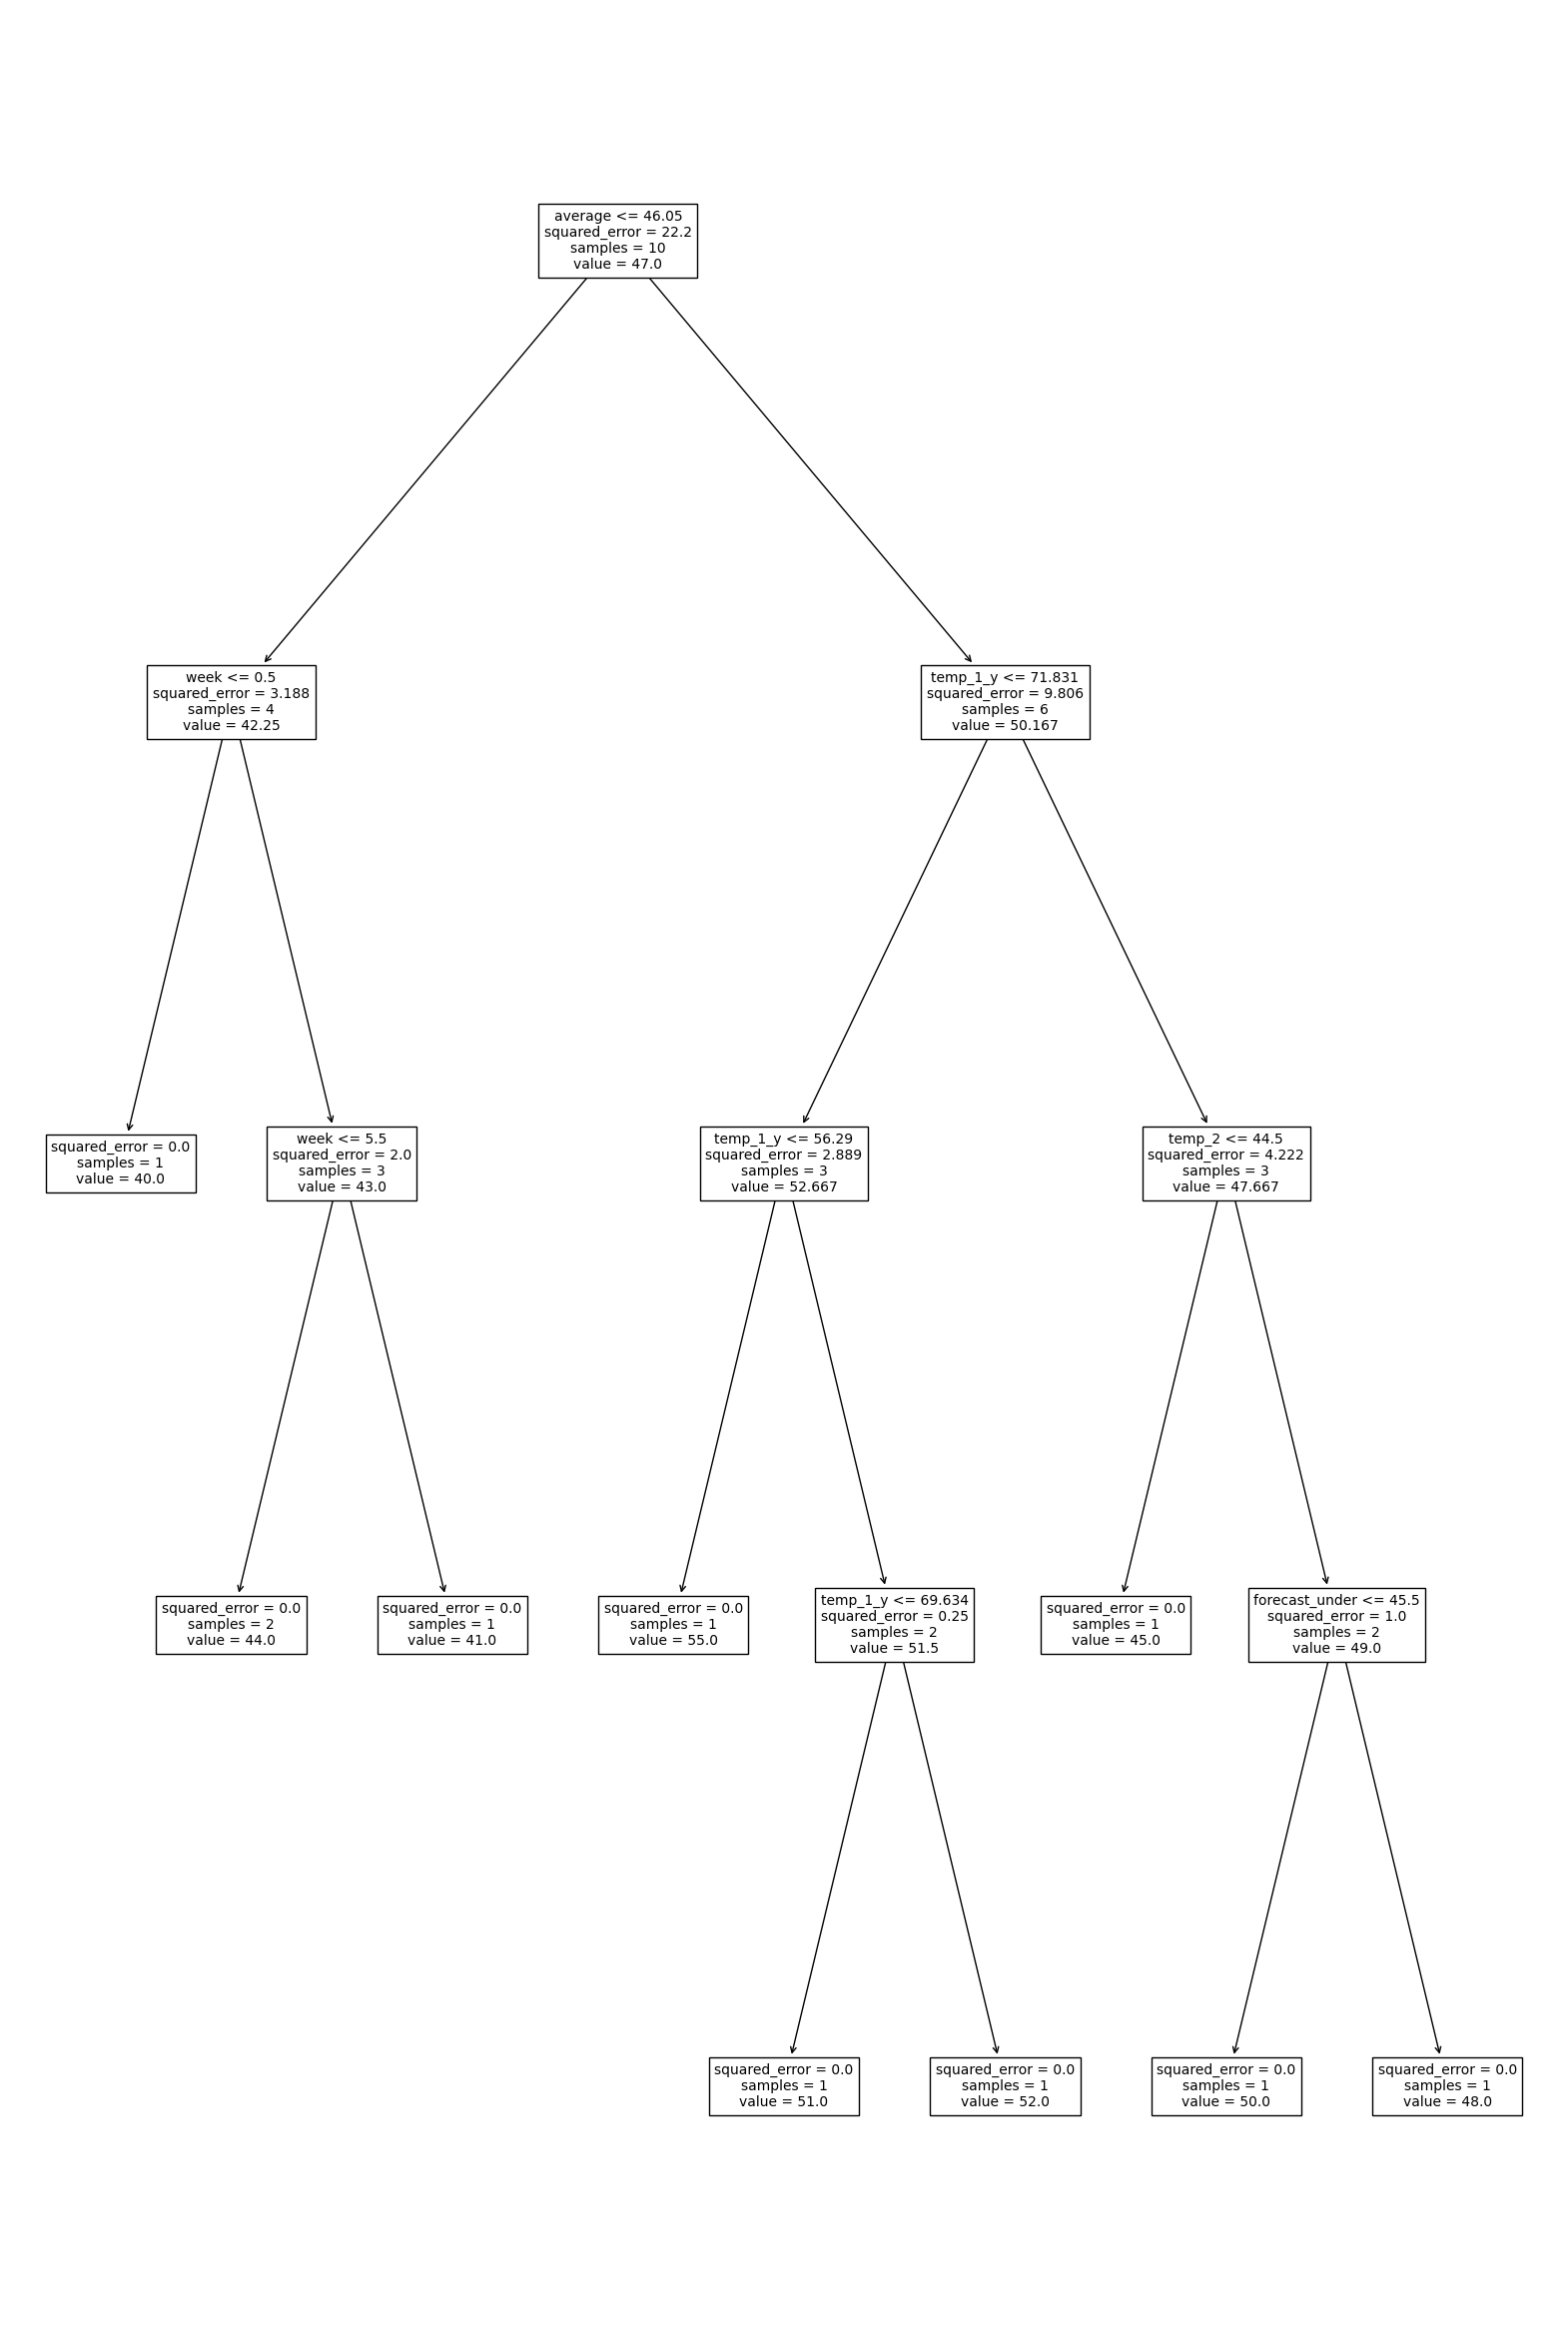

In [68]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [70]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [71]:
y_pred = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación -5.0625
MAE 4.5
MAPE 0.09773242630385487
MSE 24.25
RMSE 4.924428900898052


### 9. Vuelve a representar su árbol

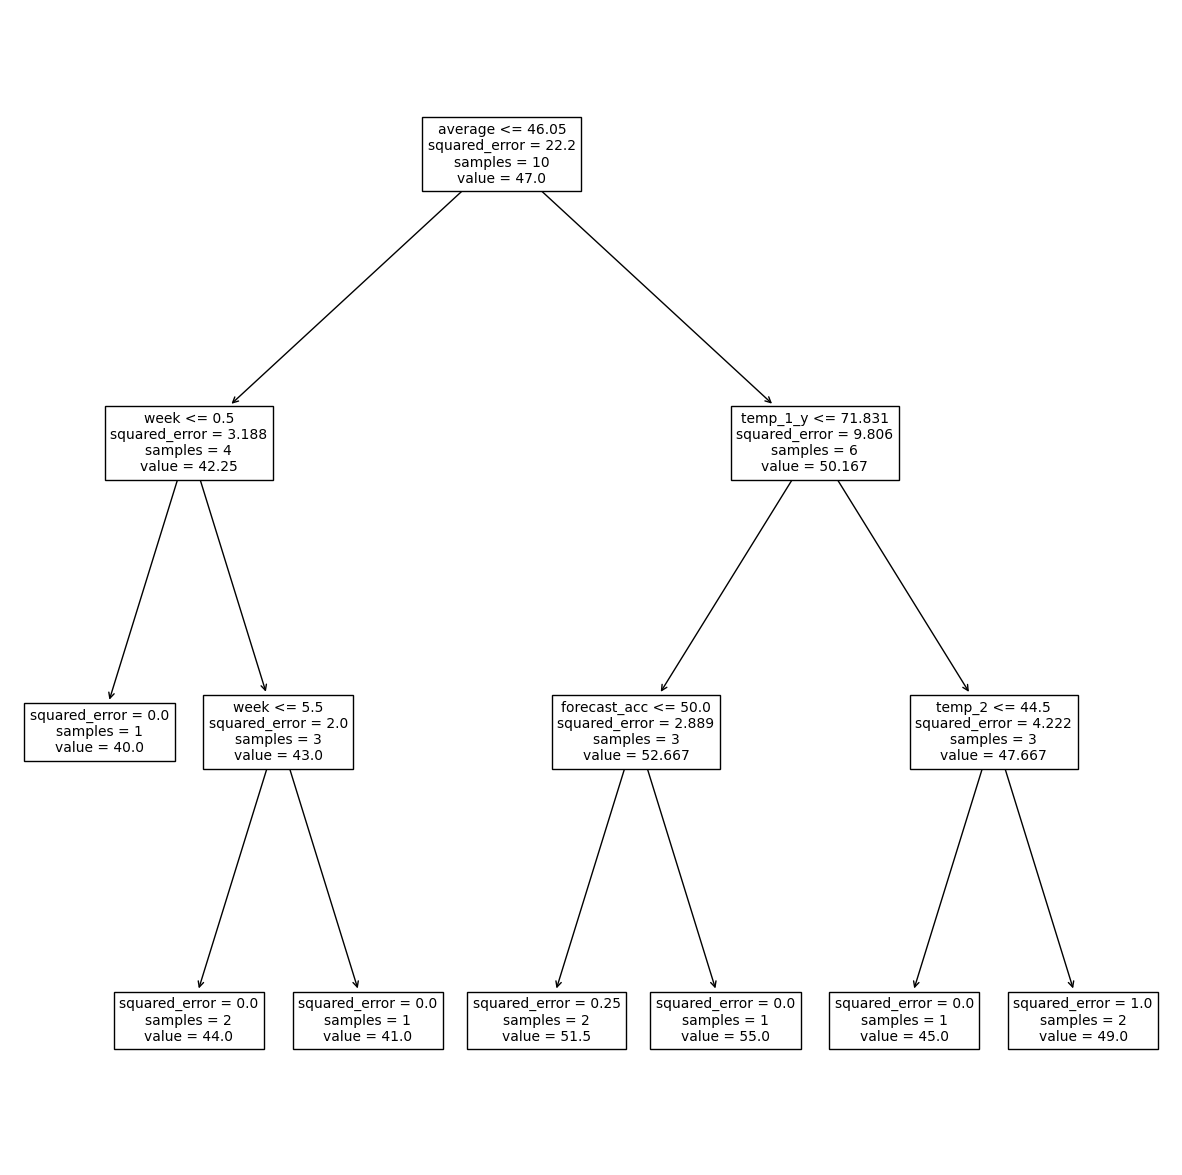

In [72]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [74]:
pd.DataFrame(dtr_3.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

,importance
average,0.685270
temp_1_y,0.170843
week,0.058087
temp_2,0.048595
forecast_acc,0.037206
year,0.000000
month,0.000000
day,0.000000
temp_1_x,0.000000
forecast_noaa,0.000000


In [75]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [76]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
6,average,0.685270
11,temp_1_y,0.170843
3,week,0.058087
4,temp_2,0.048595
8,forecast_acc,0.037206
0,year,0.000000
1,month,0.000000
2,day,0.000000
5,temp_1_x,0.000000
7,forecast_noaa,0.000000


In [77]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

In [78]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [80]:
y_pred = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación -6.214285714285714
MAE 5.666666666666667
MAPE 0.12297120868549442
MSE 33.666666666666664
RMSE 5.802298395176403


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<AxesSubplot:>

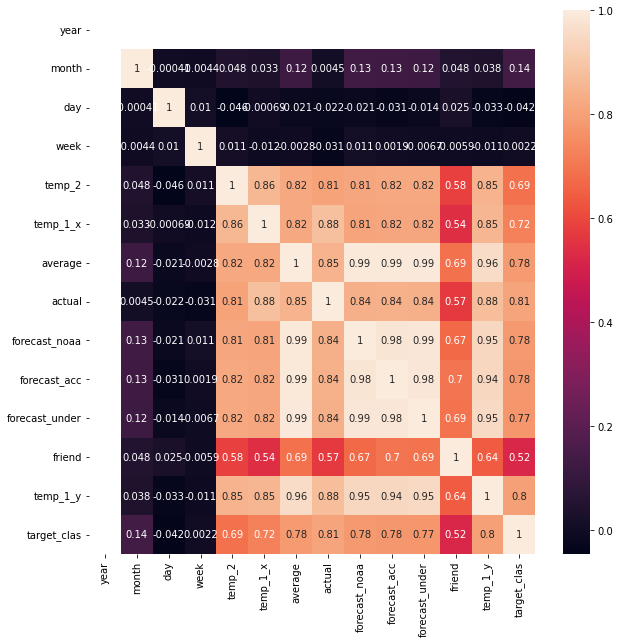

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [81]:
df['target_clas'].value_counts()

1    204
0    144
Name: target_clas, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [88]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [93]:
dtc.feature_importances_

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9

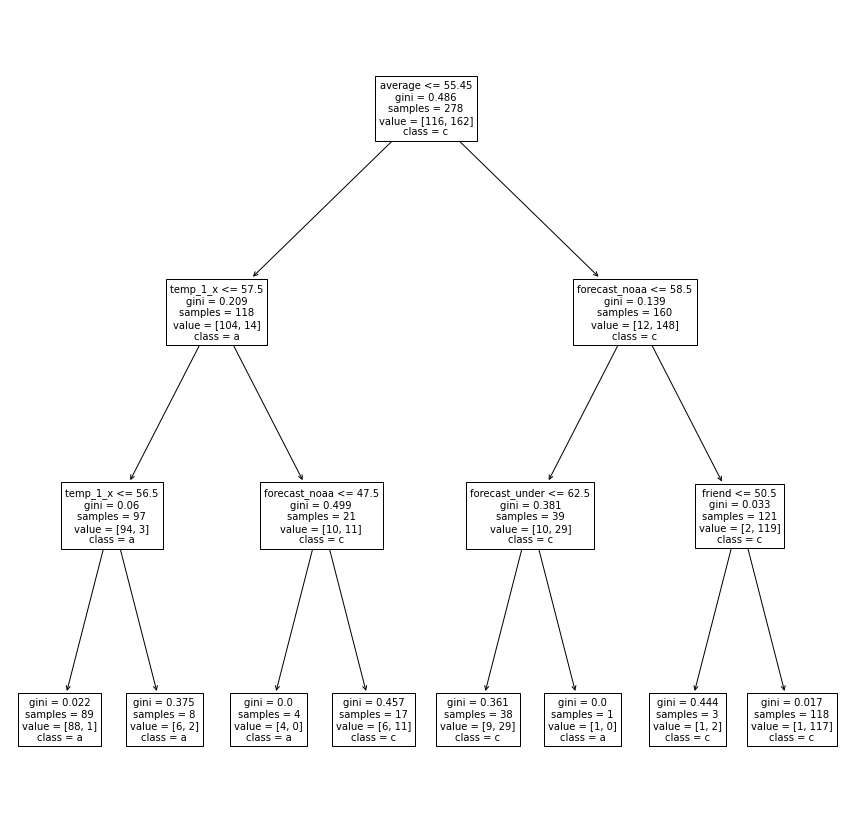

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

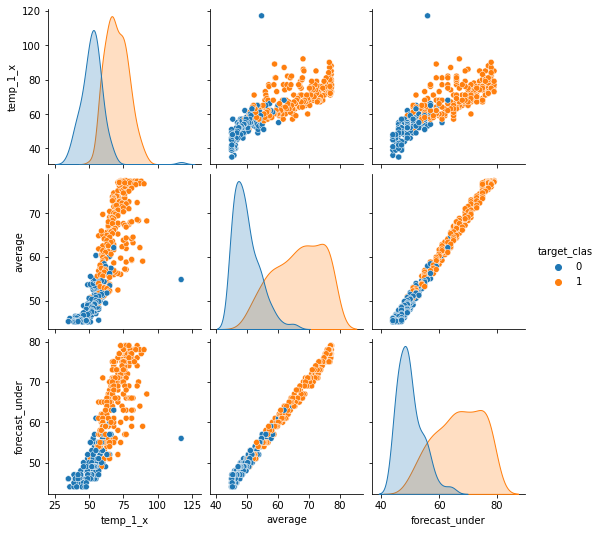

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')